In [1]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the NetCDF file
ds = xr.open_dataset('IMERG_land_sea_mask.nc')

# Print basic information about the dataset
print(ds)

# Use the correct variable name 'landseamask'
data = ds['landseamask']

# Create a simple plot
plt.figure(figsize=(12, 8))
im = plt.imshow(data, cmap='viridis', origin='lower', 
                extent=[data.lon.min(), data.lon.max(), data.lat.min(), data.lat.max()])
plt.title('IMERG Land-Sea Mask')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(im, label='Mask Value')
plt.show()

# Close the dataset
ds.close()

ModuleNotFoundError: No module named 'secrets'

In [2]:
import numpy as np

print(np.__version__)

2.1.2


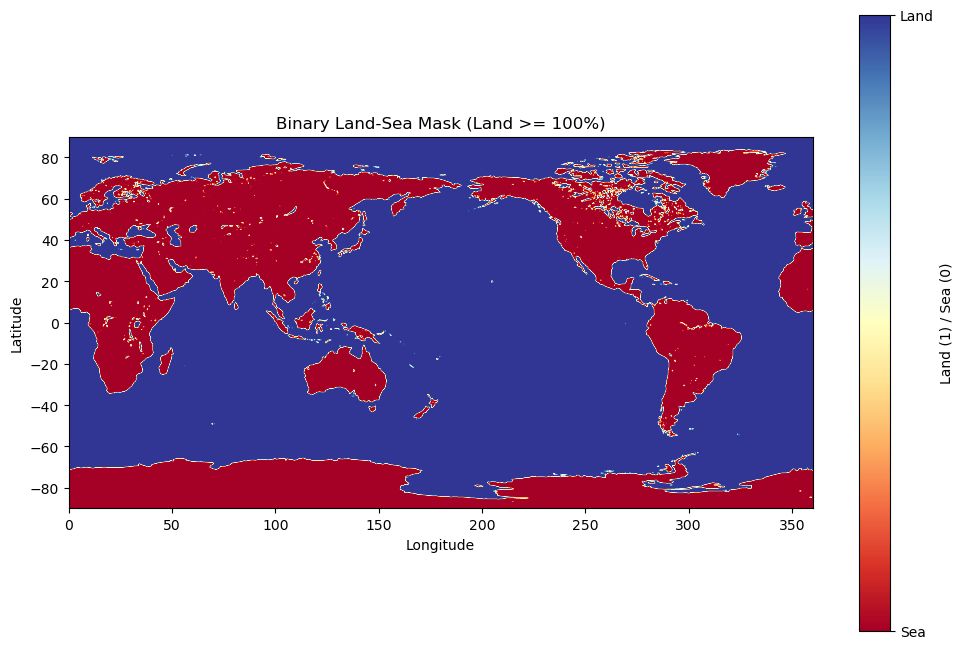

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Open the original NetCDF file
ds = xr.open_dataset('IMERG_land_sea_mask.nc')

# Get the landseamask data
landseamask = ds['landseamask']

# Create binary mask: 1 for land (>= 25% land), 0 for sea (< 25% land)
binary_mask = (landseamask >= 25).astype(np.float32)

# Create a new DataArray with the binary mask
binary_da = xr.DataArray(
    data=binary_mask,
    dims=landseamask.dims,
    coords=landseamask.coords,
    attrs={'long_name': 'Binary Land-Sea Mask', 'units': '1 for land, 0 for sea'}
)

# Create a new Dataset with the binary mask
new_ds = xr.Dataset({'binary_landseamask': binary_da})

# Save the new Dataset as a NetCDF file
new_ds.to_netcdf('binary_land_sea_mask.nc')

# Visualize the binary mask
plt.figure(figsize=(12, 8))
im = plt.imshow(binary_da, cmap='RdYlBu', origin='lower', 
                extent=[binary_da.lon.min(), binary_da.lon.max(), 
                        binary_da.lat.min(), binary_da.lat.max()])
plt.title('Binary Land-Sea Mask (Land >= 100%)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(im, label='Land (1) / Sea (0)')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Sea', 'Land'])
plt.show()

# Close the datasets
ds.close()
new_ds.close()

<xarray.Dataset>
Dimensions:             (lon: 3602, lat: 1800)
Coordinates:
  * lon                 (lon) float64 -0.05 0.05 0.15 0.25 ... 359.9 360.0 360.1
  * lat                 (lat) float64 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
Data variables:
    binary_landseamask  (lat, lon) float32 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0


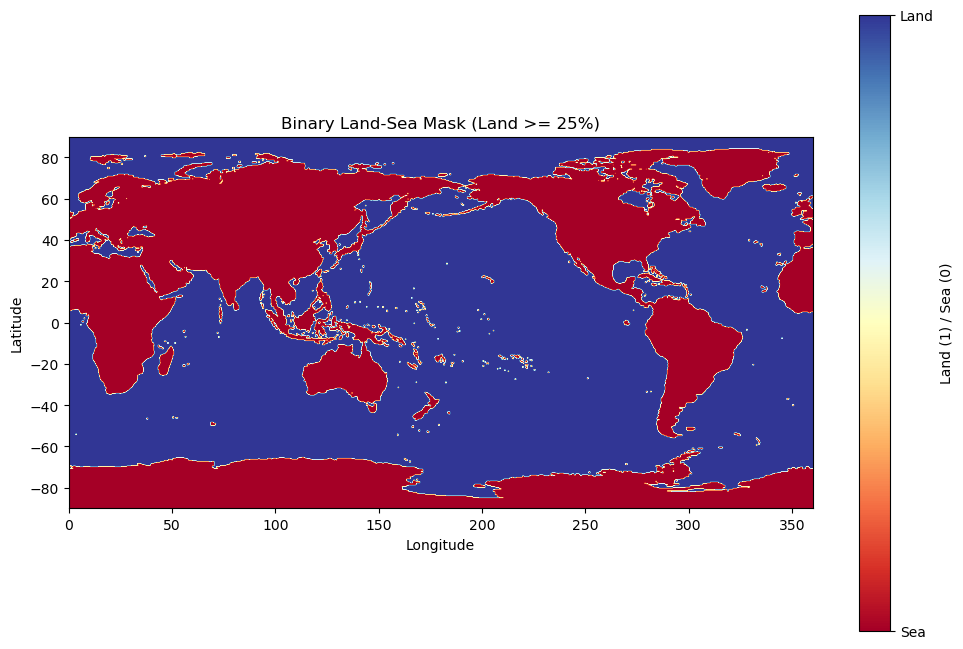

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Open the original NetCDF file
ds = xr.open_dataset('IMERG_land_sea_mask.nc')

# Get the landseamask data
landseamask = ds['landseamask']

# Create binary mask: 1 for land (>= 25% land), 0 for sea (< 25% land)
binary_mask = (landseamask >= 100).astype(np.float32)

# Create a new DataArray with the binary mask
binary_da = xr.DataArray(
    data=binary_mask,
    dims=landseamask.dims,
    coords=landseamask.coords,
    attrs={'long_name': 'Binary Land-Sea Mask', 'units': '1 for land, 0 for sea'}
)

# Create a new Dataset with the binary mask
new_ds = xr.Dataset({'binary_landseamask': binary_da})

print(new_ds)

# Save the new Dataset as a NetCDF file
new_ds.to_netcdf('binary_land_sea_mask.nc')

# Visualize the binary mask
plt.figure(figsize=(12, 8))
im = plt.imshow(binary_da, cmap='RdYlBu', origin='lower', 
                extent=[binary_da.lon.min(), binary_da.lon.max(), 
                        binary_da.lat.min(), binary_da.lat.max()])
plt.title('Binary Land-Sea Mask (Land >= 25%)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(im, label='Land (1) / Sea (0)')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Sea', 'Land'])
plt.show()

# Close the datasets
ds.close()
new_ds.close()

Original coordinate ranges:
Longitude: -0.05° to 360.05°
Latitude: -89.95° to 89.95°

Transformed coordinate ranges:
Your boundaries are : North 89.95°, South -89.95°, East 179.95°, West -179.95°


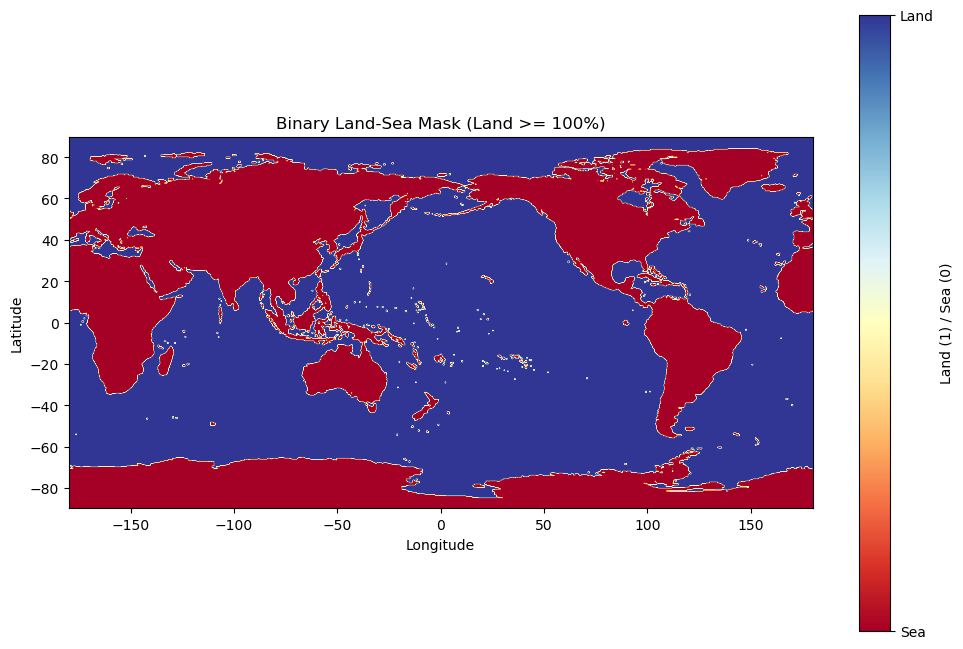

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Open the original NetCDF file
ds = xr.open_dataset('IMERG_land_sea_mask.nc')

# Get the landseamask data
landseamask = ds['landseamask']

# Get min and max of original lat and lon
lon_min_orig = float(landseamask.lon.min())
lon_max_orig = float(landseamask.lon.max())
lat_min_orig = float(landseamask.lat.min())
lat_max_orig = float(landseamask.lat.max())

print(f"Original coordinate ranges:")
print(f"Longitude: {lon_min_orig:.2f}° to {lon_max_orig:.2f}°")
print(f"Latitude: {lat_min_orig:.2f}° to {lat_max_orig:.2f}°")

# Transform longitude coordinates to -180 to 180 range
lon = landseamask.lon.values
lon_transformed = np.where(lon > 180, lon - 360, lon)

# Create binary mask: 1 for land (>= 25% land), 0 for sea (< 25% land)
binary_mask = (landseamask >= 100).astype(np.float32)

# Create a new DataArray with the binary mask and transformed coordinates
binary_da = xr.DataArray(
    data=binary_mask,
    dims=landseamask.dims,
    coords={'lat': landseamask.lat, 'lon': ('lon', lon_transformed)},
    attrs={'long_name': 'Binary Land-Sea Mask', 'units': '1 for land, 0 for sea'}
)

# Create a new Dataset with the binary mask
new_ds = xr.Dataset({'binary_landseamask': binary_da})

# Save the new Dataset as a NetCDF file
new_ds.to_netcdf('binary_land_sea_mask.nc')

# Calculate and print boundaries of transformed coordinates
north = float(binary_da.lat.max())
south = float(binary_da.lat.min())
east = float(binary_da.lon.max())
west = float(binary_da.lon.min())

print(f"\nTransformed coordinate ranges:")
print(f"Your boundaries are : North {north:.2f}°, South {south:.2f}°, East {east:.2f}°, West {west:.2f}°")

# Visualize the binary mask
plt.figure(figsize=(12, 8))
im = plt.imshow(binary_da, cmap='RdYlBu', origin='lower', 
                extent=[west, east, south, north])
plt.title('Binary Land-Sea Mask (Land >= 100%)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(im, label='Land (1) / Sea (0)')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Sea', 'Land'])
plt.show()

# Close the datasets
ds.close()
new_ds.close()